## import & load

In [1]:
import pandas as pd
import numpy as np
import sys
import requests
import pprint

import datetime
import pytz
import importlib
import matplotlib.pyplot as plt

import datetime, json, math
from google.cloud import bigquery
from numpy_ext import rolling_apply as rolling_apply_ext

In [2]:
import logging

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(threadName)-12.12s] [%(levelname)-5.5s]  %(message)s",
    handlers=[
        logging.StreamHandler(sys.stdout)
    ]
)

In [3]:
import os

if os.path.exists('credential.json'):
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.join(os.getcwd(), 'credential.json')
    os.environ["GOOGLE_CLOUD_PROJECT"] = "trading-290017"
else:
    print('the credential.json file does not exist')

import importlib

In [4]:
import market_data.ingest.bq.cache
importlib.reload(market_data.ingest.bq.common)
importlib.reload(market_data.ingest.bq.cache)

<module 'market_data.ingest.bq.cache' from '/home/junlim/projects/jitter_recovery/market_data/ingest/bq/cache.py'>

## calculate/cache feature

In [10]:
import algo.alpha.jitter_recovery.calculate
importlib.reload(algo.alpha.jitter_recovery.calculate)
import algo.alpha.collective_jitter_recovery.calculate
importlib.reload(algo.alpha.collective_jitter_recovery.calculate)
import algo.alpha.jitter_recovery.research
importlib.reload(algo.alpha.jitter_recovery.research)
import algo.feature.jitter.research
importlib.reload(algo.feature.jitter.research)
import algo.cache
importlib.reload(algo.cache)

<module 'algo.cache' from '/home/junlim/projects/jitter_recovery/algo/cache.py'>

In [12]:
feature_param = algo.feature.jitter.calculate.JitterFeatureParam(30)

In [14]:
algo.feature.jitter.research.get_feature_label_for_caching(feature_param)

'feature/(changes)_window(30)'

## multiple symbols

In [22]:
trading_param = algo.alpha.jitter_recovery.calculate.JitterRecoveryTradingParam(
    feature_param, 
    0.20, -0.04, 0.02, is_long_term=False)

In [23]:
algo.alpha.jitter_recovery.research.get_trading_label_for_caching(trading_param)

'trading/(changes_trading)_feature_param(window(30))_jump_threshold(0.2)_drop_from_jump_threshold(-0.04)_exit_jumpt_threshold(0.02)_is_long_term(False)'

In [24]:
date_str_from='2024-01-01'
date_str_to='2024-05-10'

2024-07-30 15:45:59,665 [MainThread  ] [INFO ]  filename='/home/junlim/algo_cache/trading/(changes_trading)_feature_param(window(30))_jump_threshold(0.2)_drop_from_jump_threshold(-0.04)_exit_jumpt_threshold(0.02)_is_long_term(False)/trading-290017.market_data.by_minute/2022-06-21T00:00:00-0400_2022-06-22T00:00:00-0400.parquet' does not exist in local cache. For gcs, blob_exist=False.
2024-07-30 15:45:59,666 [MainThread  ] [INFO ]  df_cache is None for (datetime.datetime(2022, 6, 21, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>), datetime.datetime(2022, 6, 22, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>))
2024-07-30 15:45:59,715 [MainThread  ] [INFO ]  filename='/home/junlim/algo_cache/trading/(changes_trading)_feature_param(window(30))_jump_threshold(0.2)_drop_from_jump_threshold(-0.04)_exit_jumpt_threshold(0.02)_is_long_term(False)/trading-290017.market_data.by_minute/2022-06-22T00:00:00-0400_2022-06-23T00:00:00-0400.parquet' does not exi

<Axes: xlabel='timestamp'>

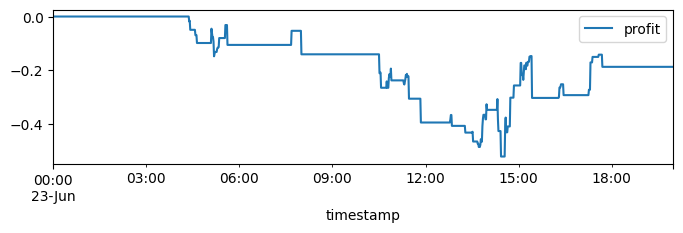

In [26]:
dfst_trading = algo.cache.read_df(
    label = algo.alpha.jitter_recovery.research.get_trading_label_for_caching(trading_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.EQUITY,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from='2022-06-21', 
    date_str_to='2022-06-25',
    columns=['profit', 'value', 'position_changed']
)
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

In [34]:
dfst_trading[dfst_trading.profit.fillna(0) != 0].groupby(['symbol'])[['value', 'profit']].mean().sort_values('value')

,value,profit
symbol,,
HOTH,0.485875,0.000893
SNGX,0.652750,-0.017429
ORTX,0.679650,0.005275
BSGM,1.070000,-0.070000
RDHL,1.139840,-0.014750
FTEK,1.330000,0.101351
NCTY,1.753133,-0.004155
BHAT,1.982333,-0.008232
MDJH,2.211892,0.012152


In [27]:
dfst_trading[dfst_trading.profit.fillna(0) != 0][['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
BHAT,-0.197572
RDHL,-0.147498
BSGM,-0.070000
SNGX,-0.034858
PETZ,-0.017199
NCTY,-0.012465
HOTH,0.003573
ORTX,0.042203
FTEK,0.101351


2024-07-30 13:05:16,595 [MainThread  ] [INFO ]  filename='/home/junlim/algo_cache/trading/(changes_trading)_feature_param(window(30))_jump_threshold(0.2)_drop_from_jump_threshold(-0.04)_exit_jumpt_threshold(0.02)_is_long_term(False)/trading-290017.market_data_okx.by_minute/2024-01-01T00:00:00-0500_2024-01-02T00:00:00-0500.parquet' does not exist in local cache. For gcs, blob_exist=False.
2024-07-30 13:05:16,597 [MainThread  ] [INFO ]  df_cache is None for (datetime.datetime(2024, 1, 1, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>), datetime.datetime(2024, 1, 2, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>))


<Axes: xlabel='timestamp'>

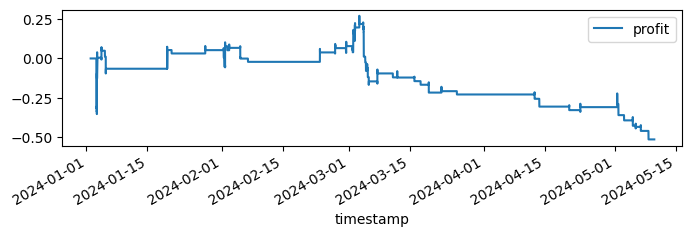

In [18]:
dfst_trading = algo.cache.read_df(
    label = algo.alpha.jitter_recovery.research.get_trading_label_for_caching(trading_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from=date_str_from, 
    date_str_to=date_str_to,
    columns=['profit', 'value', 'position_changed']
)
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

In [21]:
dfst_trading = algo.cache.read_df(
    label = algo.jitter_recovery.research.get_trading_label_for_caching(trading_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from=date_str_from, 
    date_str_to=date_str_to,
    columns=['profit', 'value', 'position_changed']
)
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

2024-05-14 15:48:21,366 [MainThread  ] [INFO ]  filename='/home/junlim/algo_cache/trading/(changes_trading)_feature_param(window(30))_jump_threshold(0.2)_drop_from_jump_threshold(-0.04)_exit_jumpt_threshold(0.02)_is_long_term(False)/trading-290017.market_data_okx.by_minute/2024-01-01T00:00:00-0500_2024-01-02T00:00:00-0500.parquet' does not exist in local cache. For gcs, blob_exist=False.
2024-05-14 15:48:21,368 [MainThread  ] [INFO ]  df_cache is None for (datetime.datetime(2024, 1, 1, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>), datetime.datetime(2024, 1, 2, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>))


<Axes: xlabel='timestamp'>

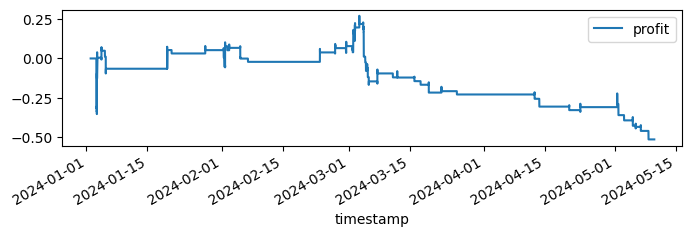

In [22]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

In [ ]:
date_str_from='2024-04-01'
date_str_to='2024-05-10'

2024-05-14 17:13:29,437 [MainThread  ] [INFO ]  filename='/home/junlim/algo_cache/trading/(changes_trading)_feature_param(window(30))_jump_threshold(0.2)_drop_from_jump_threshold(-0.04)_exit_jumpt_threshold(0.02)_is_long_term(False)/trading-290017.market_data_cex.by_minute/2024-01-01T00:00:00-0500_2024-01-02T00:00:00-0500.parquet' does not exist in local cache. For gcs, blob_exist=False.
2024-05-14 17:13:29,437 [MainThread  ] [INFO ]  df_cache is None for (datetime.datetime(2024, 1, 1, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>), datetime.datetime(2024, 1, 2, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>))
2024-05-14 17:13:29,469 [MainThread  ] [INFO ]  filename='/home/junlim/algo_cache/trading/(changes_trading)_feature_param(window(30))_jump_threshold(0.2)_drop_from_jump_threshold(-0.04)_exit_jumpt_threshold(0.02)_is_long_term(False)/trading-290017.market_data_cex.by_minute/2024-01-02T00:00:00-0500_2024-01-03T00:00:00-0500.parquet' does n

<Axes: xlabel='timestamp'>

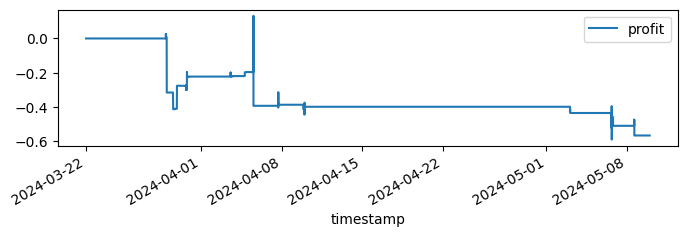

In [12]:
dfst_trading = algo.cache.read_df(
    label = algo.jitter_recovery.research.get_trading_label_for_caching(trading_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.CEX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from=date_str_from, 
    date_str_to=date_str_to,
    columns=['profit', 'value', 'position_changed']
)
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

In [13]:
dfst_trading = algo.cache.read_df(
    label = algo.jitter_recovery.research.get_trading_label_for_caching(trading_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.BINANCE,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from=date_str_from, 
    date_str_to=date_str_to,
    columns=['profit', 'value', 'position_changed']
)
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

2024-05-14 17:15:04,370 [MainThread  ] [INFO ]  filename='/home/junlim/algo_cache/trading/(changes_trading)_feature_param(window(30))_jump_threshold(0.2)_drop_from_jump_threshold(-0.04)_exit_jumpt_threshold(0.02)_is_long_term(False)/trading-290017.market_data_binance.by_minute/2024-01-01T00:00:00-0500_2024-01-02T00:00:00-0500.parquet' does not exist in local cache. For gcs, blob_exist=False.
2024-05-14 17:15:04,375 [MainThread  ] [INFO ]  df_cache is None for (datetime.datetime(2024, 1, 1, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>), datetime.datetime(2024, 1, 2, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>))
2024-05-14 17:15:04,418 [MainThread  ] [INFO ]  filename='/home/junlim/algo_cache/trading/(changes_trading)_feature_param(window(30))_jump_threshold(0.2)_drop_from_jump_threshold(-0.04)_exit_jumpt_threshold(0.02)_is_long_term(False)/trading-290017.market_data_binance.by_minute/2024-01-02T00:00:00-0500_2024-01-03T00:00:00-0500.parquet

KeyError: "None of [Index(['profit'], dtype='object')] are in the [columns]"

2024-05-14 17:15:49,506 [MainThread  ] [INFO ]  filename='/home/junlim/algo_cache/trading/(changes_trading)_feature_param(window(30))_jump_threshold(0.2)_drop_from_jump_threshold(-0.04)_exit_jumpt_threshold(0.02)_is_long_term(False)/trading-290017.market_data_gemini.by_minute/2024-01-01T00:00:00-0500_2024-01-02T00:00:00-0500.parquet' does not exist in local cache. For gcs, blob_exist=False.
2024-05-14 17:15:49,507 [MainThread  ] [INFO ]  df_cache is None for (datetime.datetime(2024, 1, 1, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>), datetime.datetime(2024, 1, 2, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>))
2024-05-14 17:15:49,545 [MainThread  ] [INFO ]  filename='/home/junlim/algo_cache/trading/(changes_trading)_feature_param(window(30))_jump_threshold(0.2)_drop_from_jump_threshold(-0.04)_exit_jumpt_threshold(0.02)_is_long_term(False)/trading-290017.market_data_gemini.by_minute/2024-01-02T00:00:00-0500_2024-01-03T00:00:00-0500.parquet' 

<Axes: xlabel='timestamp'>

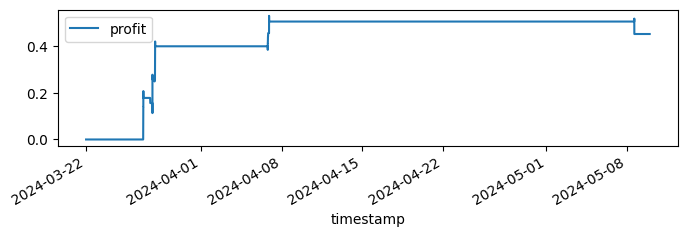

In [14]:
dfst_trading = algo.cache.read_df(
    label = algo.jitter_recovery.research.get_trading_label_for_caching(trading_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.GEMINI,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from=date_str_from, 
    date_str_to=date_str_to,
    columns=['profit', 'value', 'position_changed']
)
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

2024-05-14 17:16:12,317 [MainThread  ] [INFO ]  filename='/home/junlim/algo_cache/trading/(changes_trading)_feature_param(window(30))_jump_threshold(0.2)_drop_from_jump_threshold(-0.04)_exit_jumpt_threshold(0.02)_is_long_term(False)/trading-290017.market_data_bithumb.orderbook_level1/2024-01-01T00:00:00-0500_2024-01-02T00:00:00-0500.parquet' does not exist in local cache. For gcs, blob_exist=False.
2024-05-14 17:16:12,318 [MainThread  ] [INFO ]  df_cache is None for (datetime.datetime(2024, 1, 1, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>), datetime.datetime(2024, 1, 2, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>))
2024-05-14 17:16:12,351 [MainThread  ] [INFO ]  filename='/home/junlim/algo_cache/trading/(changes_trading)_feature_param(window(30))_jump_threshold(0.2)_drop_from_jump_threshold(-0.04)_exit_jumpt_threshold(0.02)_is_long_term(False)/trading-290017.market_data_bithumb.orderbook_level1/2024-01-02T00:00:00-0500_2024-01-03T00:00:0

<Axes: xlabel='timestamp'>

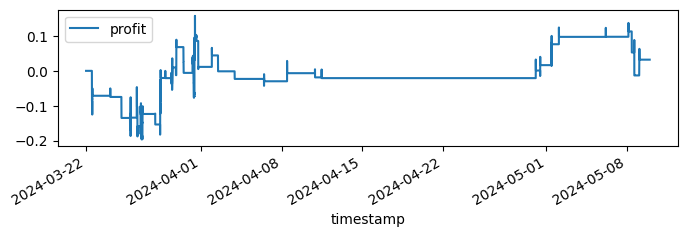

In [15]:
dfst_trading = algo.cache.read_df(
    label = algo.jitter_recovery.research.get_trading_label_for_caching(trading_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.BITHUMB,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.ORDERBOOK_LEVEL1,
    date_str_from=date_str_from, 
    date_str_to=date_str_to,
    columns=['profit', 'value', 'position_changed']
)
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

## single symbol

In [37]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)

<module 'algo.jitter_recovery.research' from '/home/junlim/projects/jitter_recovery/algo/jitter_recovery/research.py'>

In [47]:
symbol_investigate = 'AIDOGE-USDT-SWAP'
dfs = dfi.xs(symbol_investigate, level=1)

In [50]:
dfs

,open,high,low,close,volume
timestamp,,,,,
2024-03-03 05:00:00,0.0,0.0,0.0,0.0,3.422000e+13
2024-03-03 05:01:00,0.0,0.0,0.0,0.0,1.738000e+13
2024-03-03 05:02:00,0.0,0.0,0.0,0.0,3.181000e+13
2024-03-03 05:03:00,0.0,0.0,0.0,0.0,1.410000e+13
2024-03-03 05:04:00,0.0,0.0,0.0,0.0,3.950000e+12
...,...,...,...,...,...
2024-03-04 20:03:00,0.0,0.0,0.0,0.0,3.988600e+14
2024-03-04 20:04:00,0.0,0.0,0.0,0.0,1.538500e+14
2024-03-04 20:05:00,0.0,0.0,0.0,0.0,8.488000e+13


In [51]:
jitter_recovery_trading_param = algo.jitter_recovery.calculate.JitterRecoveryTradingParam(
    algo.jitter_recovery.calculate.JitterRecoveryFeatureParam(30), 
    0.20, -0.04, 0.02, is_long_term=False)

no trading happens


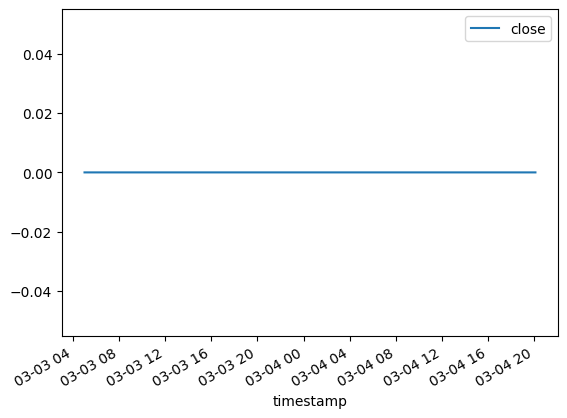

In [52]:
df_feature, df_trading = algo.jitter_recovery.research.investigate_symbol(df, symbol_investigate, jitter_recovery_trading_param, figsize=(12, 11))

In [146]:
df_trading[(df_trading.position_changed != 0)][['value', 'in_position', 'position_changed', 'profit_raw', 'profit']].dropna()

,value,in_position,position_changed,profit_raw,profit
timestamp,,,,,
2024-01-03 12:27:00,1.7395,1,1.0,0.000,0.000000
2024-01-03 12:29:00,1.8060,0,-1.0,-0.016,-0.008939


In [147]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    if row['symbol'] != symbol_investigate: continue
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2024-01-03 12:27:00, ARB-USDT-SWAP, 1.7395, position_changed: 1.0
2024-01-03 12:28:00, ARB-USDT-SWAP, 1.79, position_changed: -1.0
